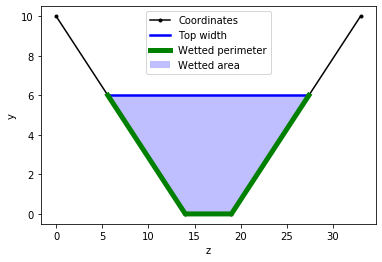

In [1]:
%matplotlib inline

from pantherapy.panthera import CrossSection


y_xs = [10, 0, 0, 10]
z_xs = [0, 14, 19, 33]
roughness = 0.020

depth = 6

xs = CrossSection(y_xs, z_xs, roughness)
_ = xs.plot(depth)

In [2]:
import numpy as np

from pantherapy.reach import Reach
from pantherapy.steady.boundaryvalue import BoundaryValuePlan


slope = 0.0005
L = 5000
stream_distance = np.linspace(0, L, 101)
thalweg = stream_distance[::-1]*slope + 2.5

reach = Reach()
for x, y in zip(stream_distance, thalweg):
    reach.put(xs, x, y)

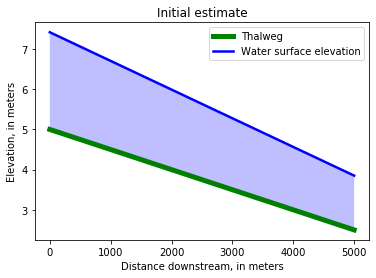

In [3]:
import matplotlib.pyplot as plt

from pantherapy.steady.solution import SteadySolution

normal_flow = 30
normal_depth = xs.normal_depth(normal_flow, slope)
critical_depth = xs.critical_depth(normal_flow)

h_0 = thalweg[0] + normal_depth
h_n = thalweg[-1] + critical_depth

q_0 = 20

s_wse = -(h_n - h_0)/L
wse_0 = s_wse*stream_distance[::-1] + h_n

ax = plt.axes()
ax.set_title("Initial estimate")
initial_estimate = SteadySolution(stream_distance, thalweg, wse_0)
_ = initial_estimate.plot(ax)

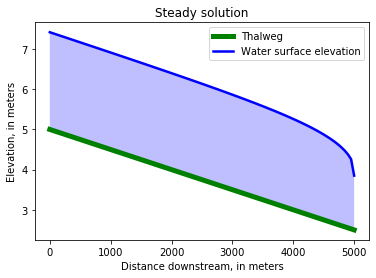

In [4]:
ax = plt.axes()
ax.set_title("Steady solution")

plan = BoundaryValuePlan(reach)
solution = plan.solve(wse_0, q_0)

_ = solution.plot(ax)

In [5]:
solution.iterations()

3

In [6]:
solution.discharge()

30.083428639745488